In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from keras.optimizers import rmsprop_v2
import pylab as plt

In [ ]:
batch_size = 128
num_classes = 10
epochs = 2

In [ ]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
(x_train.shape,y_train.shape), (x_test.shape, y_test.shape)

(((60000, 28, 28), (60000,)), ((10000, 28, 28), (10000,)))

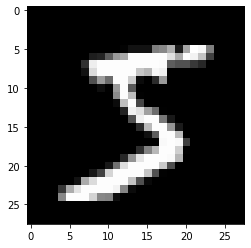

In [ ]:
plt.imshow(x_train[0],cmap = "gray")

In [ ]:
y_train[0]

5

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

In [ ]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=rmsprop_v2.RMSprop(),
              metrics=['accuracy'])

### Training

In [ ]:
# Write the Training input and output variables, size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=1)

Epoch 1/2
469/469 [==============================] - 5s 8ms/step - loss: 1.6006 - accuracy: 0.5462
Epoch 2/2
469/469 [==============================] - 4s 8ms/step - loss: 0.6864 - accuracy: 0.8369


In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.48725757002830505
Test accuracy: 0.8751000165939331


In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[10:15])
prediction = prediction[1]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

Prediction
 [4.93544370e-01 8.02080758e-05 1.09810516e-01 1.42532457e-02
 6.32258281e-02 1.03047282e-01 1.91525191e-01 9.48034460e-04
 1.49829527e-02 8.58234148e-03]

Thresholded output
 [0 0 0 0 0 0 0 0 0 0]


In [ ]:
y_test[11]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

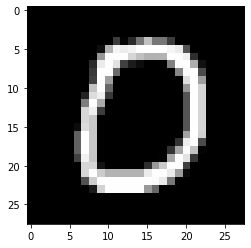

In [ ]:
plt.imshow(x_test[10:11].reshape(28,28), cmap = "gray")
plt.show()

### Question 1

In [ ]:
first_layer_size_list = [32, 4, 128, 512, 2056]
acc_list=[]
for first_layer_size in first_layer_size_list:
  model = Sequential()
  model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
  model.add(Dense(num_classes, activation='softmax'))
  print(model.summary())
  model.compile(loss='categorical_crossentropy',
                optimizer=rmsprop_v2.RMSprop(),
                metrics=['accuracy'])

  # Write the Training input and output variables, size of the batch, number of epochs
  history = model.fit(x_train,y_train,
                      batch_size=batch_size,
                      epochs=10,
                      verbose=1)

  # Write the testing input and output variables
  score = model.evaluate(x_test, y_test, verbose=0)
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  acc_list.append(score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                25120     
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==============================] - 4s 6ms/step - loss: 0.8333 - accuracy: 0.8317
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.3435 - accuracy: 0.9090
Epoch 3/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2724 - accuracy: 0.9222
Epoch 4/10
469/469 [==============================] - 2s 4ms/step - loss: 0.2381 - accuracy: 0.9312
Epoch 5/10
469/469 [=====================

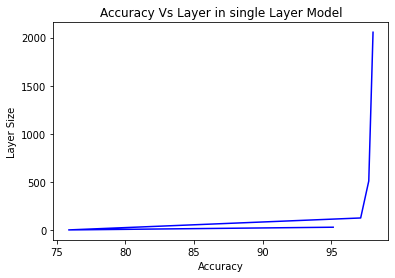

In [ ]:
acc_list = [round(x*100, 2) for x in acc_list]
def plot_graph(x, y, x_label, y_label, title, color):
    plt.plot(x, y, color)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
plot_graph(acc_list, first_layer_size_list, "Accuracy", "Layer Size", "Accuracy Vs Layer in single Layer Model", "blue")

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2056)              1613960   
                                                                 
 dense_15 (Dense)            (None, 32)                65824     
                                                                 
 dense_16 (Dense)            (None, 32)                1056      
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 10)                330       
                                                                 
Total params: 1,682,226
Trainable params: 1,682,226
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [===================

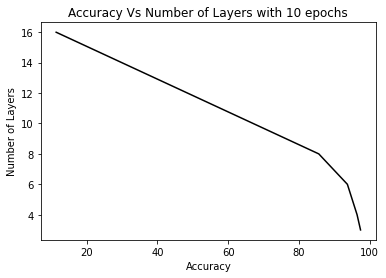






Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 2056)              1613960   
                                                                 
 dense_62 (Dense)            (None, 32)                65824     
                                                                 
 dense_63 (Dense)            (None, 32)                1056      
                                                                 
 dense_64 (Dense)            (None, 32)                1056      
                                                                 
 dense_65 (Dense)            (None, 10)                330       
                                                                 
Total params: 1,682,226
Trainable params: 1,682,226
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [=============

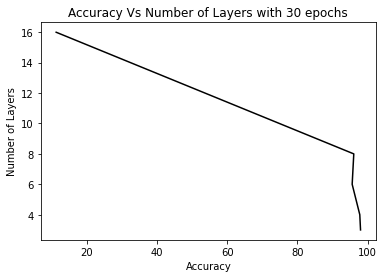

In [ ]:
epochs_list = [10, 30]
for ep_no in epochs_list:
  num_of_layers = [3, 4, 6, 8, 16]
  accuracy_list = []
  for num in num_of_layers:
    model = Sequential()
    model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
    for _ in range(num):
      model.add(Dense(32, activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))
    print(model.summary())
    model.compile(loss='categorical_crossentropy',
                  optimizer=rmsprop_v2.RMSprop(),
                  metrics=['accuracy'])
    history = model.fit(x_train,y_train,
                        batch_size=batch_size,
                        epochs=ep_no,
                        verbose=1)
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    accuracy_list.append(score[1])
  
  accuracy_list = [round(x*100, 2) for x in accuracy_list]
  plot_graph(accuracy_list, num_of_layers, "Accuracy", "Number of Layers", "Accuracy Vs Number of Layers with {} epochs".format(ep_no), "black")
  for _ in range(5):
    print()
  


Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_108 (Dense)           (None, 2056)              1613960   
                                                                 
 dense_109 (Dense)           (None, 256)               526592    
                                                                 
 dense_110 (Dense)           (None, 128)               32896     
                                                                 
 dense_111 (Dense)           (None, 64)                8256      
                                                                 
 dense_112 (Dense)           (None, 32)                2080      
                                                                 
 dense_113 (Dense)           (None, 16)                528       
                                                                 
 dense_114 (Dense)           (None, 10)              

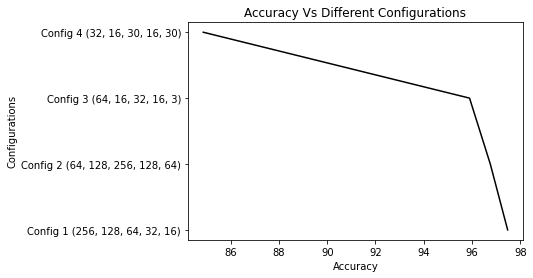

In [ ]:
config_list = [[256, 128, 64, 32, 16], [64, 128, 256, 128, 64], [64, 16, 32, 16, 36], [32, 16, 30, 16, 30]]
config_list_graph = ["Config 1 (256, 128, 64, 32, 16)", "Config 2 (64, 128, 256, 128, 64)", "Config 3 (64, 16, 32, 16, 3)", "Config 4 (32, 16, 30, 16, 30)"]
accuracy_list = []
for config in config_list:
    model = Sequential()
    model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
    for i in range(5):
      model.add(Dense(config[i], activation='sigmoid'))
    model.add(Dense(num_classes, activation='softmax'))

    print(model.summary())

    model.compile(loss='categorical_crossentropy',
                  optimizer=rmsprop_v2.RMSprop(),
                  metrics=['accuracy'])

    # Write the Training input and output variables, size of the batch, number of epochs
    history = model.fit(x_train,y_train,
                        batch_size=batch_size,
                        epochs=10,
                        verbose=1)

    # Write the testing input and output variables
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    accuracy_list.append(score[1])

accuracy_list = [round(x*100, 2) for x in accuracy_list]
plot_graph(accuracy_list, config_list_graph, "Accuracy", "Configurations", "Accuracy Vs Different Configurations", "black")
for _ in range(5):
  print()


In [ ]:
epochs_list = [10, 30]
for ep_no in epochs_list:
  num_of_layers = [3]
  accuracy_list = []
  for num in num_of_layers:
    model = Sequential()
    model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
    for _ in range(num):
      model.add(Dense(32, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    print(model.summary())
    model.compile(loss='categorical_crossentropy',
                  optimizer=rmsprop_v2.RMSprop(),
                  metrics=['accuracy'])
    history = model.fit(x_train,y_train,
                        batch_size=batch_size,
                        epochs=ep_no,
                        verbose=1)
    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    accuracy_list.append(score[1])
  
  accuracy_list = [round(x*100, 2) for x in accuracy_list]

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 2056)              1613960   
                                                                 
 dense_166 (Dense)           (None, 32)                65824     
                                                                 
 dense_167 (Dense)           (None, 32)                1056      
                                                                 
 dense_168 (Dense)           (None, 32)                1056      
                                                                 
 dense_169 (Dense)           (None, 10)                330       
                                                                 
Total params: 1,682,226
Trainable params: 1,682,226
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==================

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_180 (Dense)           (None, 2056)              1613960   
                                                                 
 dense_181 (Dense)           (None, 32)                65824     
                                                                 
 dense_182 (Dense)           (None, 32)                1056      
                                                                 
 dense_183 (Dense)           (None, 32)                1056      
                                                                 
 dense_184 (Dense)           (None, 10)                330       
                                                                 
Total params: 1,682,226
Trainable params: 1,682,226
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
469/469 [==================

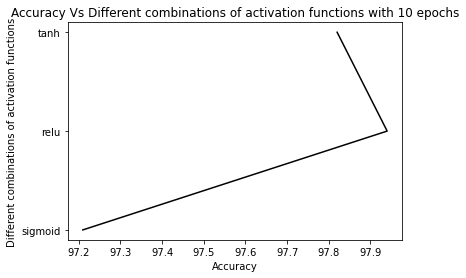






Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 2056)              1613960   
                                                                 
 dense_196 (Dense)           (None, 32)                65824     
                                                                 
 dense_197 (Dense)           (None, 32)                1056      
                                                                 
 dense_198 (Dense)           (None, 32)                1056      
                                                                 
 dense_199 (Dense)           (None, 10)                330       
                                                                 
Total params: 1,682,226
Trainable params: 1,682,226
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/30
469/469 [=============

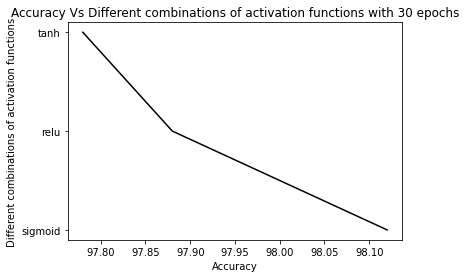

In [ ]:
epochs_list = [10, 30]
for ep_no in epochs_list:
  num_of_layers = [3]
  accuracy_list = []
  d = ['sigmoid','relu','tanh']
  for num in num_of_layers:
    model = Sequential()
    for i in d:
      model.add(Dense(first_layer_size, activation=i, input_shape=(784,)))
      for _ in range(num):
        model.add(Dense(32, activation=i))
      model.add(Dense(num_classes, activation='softmax'))
      print(model.summary())
      model.compile(loss='categorical_crossentropy',
                    optimizer=rmsprop_v2.RMSprop(),
                    metrics=['accuracy'])
      history = model.fit(x_train,y_train,
                          batch_size=batch_size,
                          epochs=ep_no,
                          verbose=1)
      score = model.evaluate(x_test, y_test, verbose=0)
      print('Test loss:', score[0])
      print('Test accuracy:', score[1])
      accuracy_list.append(score[1])
  accuracy_list = [round(x*100, 2) for x in accuracy_list]
  plot_graph(accuracy_list, d, "Accuracy", "Different combinations of activation functions", "Accuracy Vs Different combinations of activation functions with {} epochs".format(ep_no), "black")
  for _ in range(5):
    print()
  
